In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [33]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
# Utiliza seaborn para generar una paleta de colores única basada en los valores únicos en la columna 'Datos'
palette = sns.color_palette('husl', n_colors=len(df['label'].unique()))

# Crea un diccionario que asigne valores únicos a colores de la paleta
color_dict = dict(zip(df['label'].unique(), palette))

# Aplica el mapeo de colores a la columna 'Datos' para crear la nueva columna 'Colores'
df['Colores'] = df['label'].map(color_dict)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Colores      2200 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 154.8+ KB


In [5]:
df['label']=df['label'].astype('category')

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
Colores        0
dtype: int64

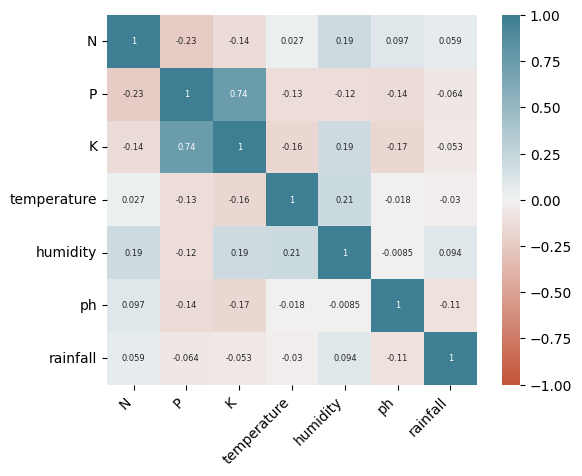

In [8]:
#corr = df.drop(['label'], axis=1).corr()
corr = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

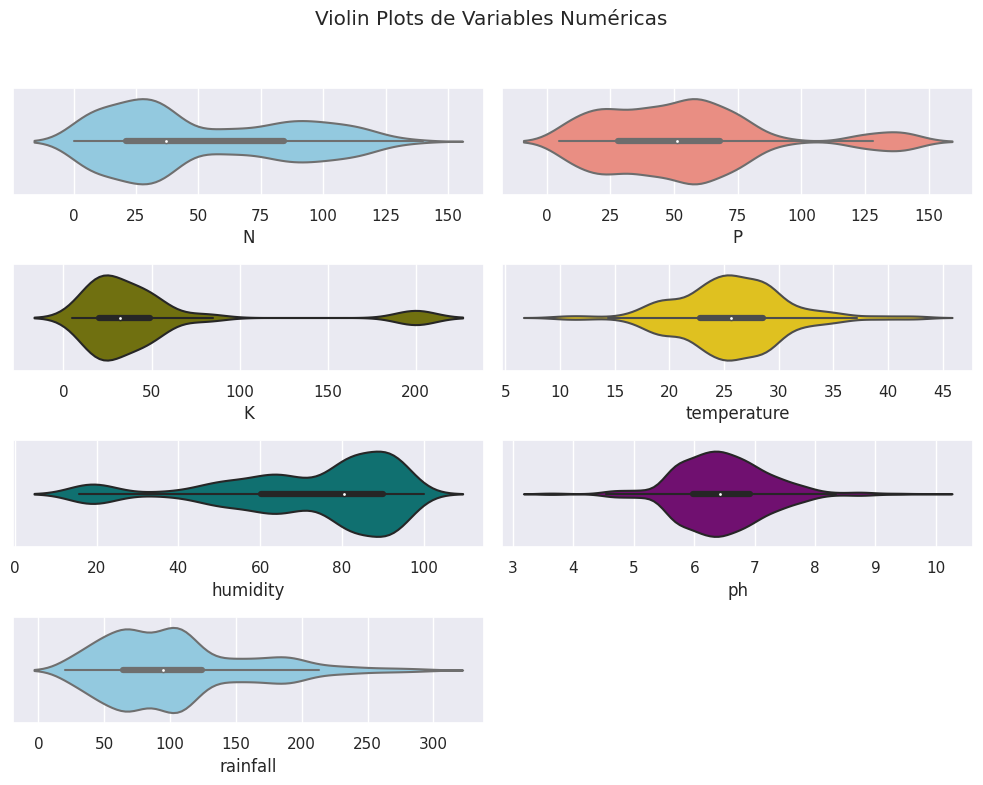

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Obtiene una lista de todas las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Calcula el número de filas y columnas necesarias para el ploteo
num_rows = (len(numeric_columns) + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Colores distintos para los violin plots
colors = ["skyblue", "salmon", "olive", "gold", "teal", "purple"]

# Itera a través de las columnas numéricas y crea un violin plot para cada una
for i, col in enumerate(numeric_columns):
    row = i // num_cols
    col_idx = i % num_cols
    
    # Selecciona un color diferente para cada violin plot
    color_idx = i % len(colors)
    color = colors[color_idx]
    
    sns.violinplot(data=df, x=col, color=color, ax=axs[row, col_idx])
    
    # Configura el título debajo del gráfico
    #axs[row, col_idx].set_title(col)
    #axs[row, col_idx].set_xlabel(col)

# Elimina cualquier subplot no utilizado
for i in range(len(numeric_columns), num_rows * num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axs[row, col_idx])

# Añade un título general a la figura
plt.suptitle("Violin Plots de Variables Numéricas")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
plt.show()


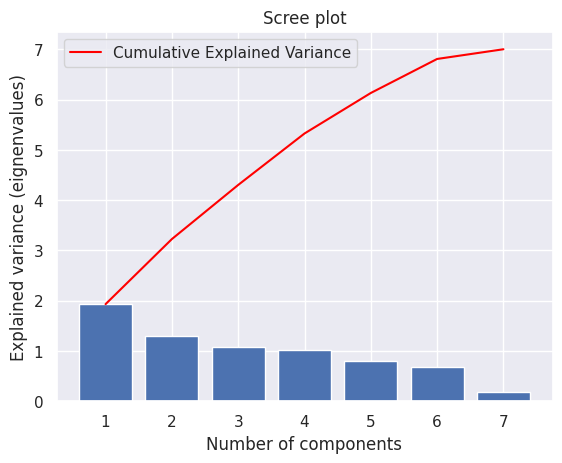

In [41]:
#xWines = df.drop(['label'], axis=1)
from sklearn.decomposition import PCA

xWines = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
yWines = df['label']

xWines_scaled = sk.preprocessing.StandardScaler().fit_transform(xWines)

#for i in range(1,5):
pca = sk.decomposition.PCA(n_components=7)
pca_Features=pca.fit(xWines_scaled)

# Bar plot of explained_variance
plt.bar(range(1,len(pca.explained_variance_)+1),
pca.explained_variance_)
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red', label='Cumulative Explained Variance')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
plt.show()

A partir de los resultados obtenidos se considera conveniente tomar 5 componentes principales, sin embargo con propósito de graficar los datos, se tomarán un total de 3.

In [42]:
pca = sk.decomposition.PCA(n_components=3)
pca_Features=pca.fit_transform(xWines_scaled)

pcaWines = pd.DataFrame(data=pca_Features, columns=['PC1', 'PC2', 'PC3'])
pcaWines['label'] = yWines
pcaWines['color'] = df['Colores']

pcaWines

,PC1,PC2,PC3,label,color
0,-0.582869,-0.844586,1.373343,rice,"(0.9677975592919913, 0.44127456009157356, 0.53..."
1,-0.474635,-0.784895,1.252178,rice,"(0.9677975592919913, 0.44127456009157356, 0.53..."
2,-0.634068,-0.694522,1.179332,rice,"(0.9677975592919913, 0.44127456009157356, 0.53..."
3,-1.047920,-1.087658,1.393351,rice,"(0.9677975592919913, 0.44127456009157356, 0.53..."
4,-0.873258,-0.658673,1.455685,rice,"(0.9677975592919913, 0.44127456009157356, 0.53..."
...,...,...,...,...,...
2195,-1.260921,-0.618363,0.711297,coffee,"(0.9654130041094379, 0.42308759349350267, 0.66..."
2196,-1.355583,-0.154043,0.701649,coffee,"(0.9654130041094379, 0.42308759349350267, 0.66..."
2197,-1.158384,-0.640475,1.045840,coffee,"(0.9654130041094379, 0.42308759349350267, 0.66..."
2198,-1.219188,0.052390,0.180855,coffee,"(0.9654130041094379, 0.42308759349350267, 0.66..."


In [ ]:
pcaWines['label'].value_counts()

label
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: count, dtype: int64

In [ ]:
def plot_interactivo(df,col1,col2,col3,label):

    # Crea el gráfico de dispersión 3D interactivo
    fig = px.scatter_3d(df, x=col1, y=col2, z=col3, color=label, title='Gráfico de Dispersión 3D Interactivo')
    fig.update_layout(scene=dict(xaxis_title=col1, yaxis_title=col2, zaxis_title=col3))
    fig.show()

plot_interactivo(pcaWheat,'PC1','PC2','PC3','label')

In [ ]:
plot_interactivo(df,'N','P','K','label')

### ISOMAP


In [18]:
xWines = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
yWines = df['label']

xWines_scaled = sk.preprocessing.StandardScaler().fit_transform(xWines)

In [27]:
from sklearn.manifold import Isomap
""" Isomap """
isomapWheat = Isomap(n_neighbors=6, n_components=3)
isomapWheat.fit(xWines_scaled)
manifold_2Da = isomapWheat.transform(xWines_scaled)
manifold_2D = pd.DataFrame(manifold_2Da,
    columns=['Component 1', 'Component 2','Component 3'])
manifold_2D['category'] = yWines.to_numpy()

/home/augusto/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/lib/python3/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/lib/python3/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/lib/python3/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/lib/python3/dist-packages/scipy/sparse/_index.py:10

In [28]:
manifold_2D.head()

,Component 1,Component 2,Component 3,category
0,4.144556,1.327438,-1.499504,rice
1,4.272144,0.754142,-0.914943,rice
2,5.086342,0.383533,-0.899580,rice
3,4.725210,0.412735,-0.956091,rice
4,5.075260,0.370068,-0.893164,rice


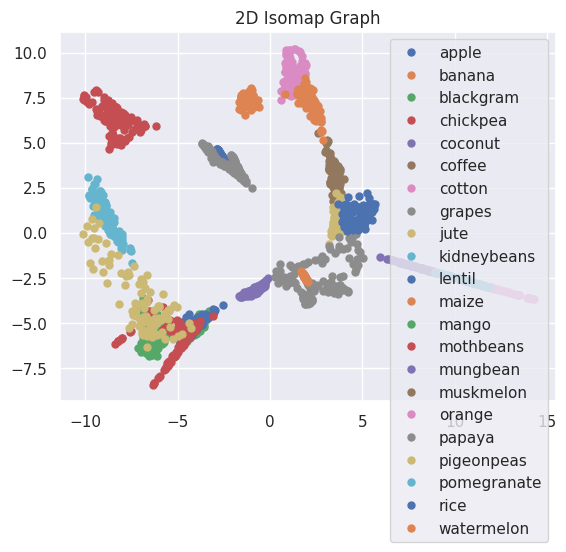

In [29]:
groups = manifold_2D.groupby('category')
plt.title('2D Isomap Graph')
for name, group in groups:
    plt.plot(group['Component 1'], group['Component 2'], marker='o', linestyle='', markersize=5, label=name)
plt.legend()

In [31]:
import plotly.express as px

# Supongamos que tienes un DataFrame llamado "manifold_2D" similar a tu ejemplo
# Asegúrate de que tienes las columnas "Component 1", "Component 2" y "category" en tu DataFrame

fig = px.scatter_3d(manifold_2D, x='Component 1', y='Component 2', z='Component 3', color='category',
                    title='3D Isomap Graph')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed